In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
from fbprophet.plot import plot
from fbprophet import Prophet

In [3]:
dataset = pd.read_csv("BTC-USD.csv")

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-16,6640.454102,7134.450684,6555.504395,7116.804199,7116.804199,4.678324e+10
1,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-18,7092.291504,7269.956543,7089.247070,7257.665039,7257.665039,3.244719e+10
3,2020-04-19,7260.922363,7280.521973,7167.054688,7189.424805,7189.424805,3.131121e+10
4,2020-04-20,7186.873535,7240.290527,6835.502930,6881.958496,6881.958496,3.774711e+10


In [6]:
dataset = dataset[["Date", "Close"]]
dataset.columns = ["ds", "y"]
print(dataset)

             ds             y
0    2020-04-16   7116.804199
1    2020-04-17           NaN
2    2020-04-18   7257.665039
3    2020-04-19   7189.424805
4    2020-04-20   6881.958496
..          ...           ...
361  2021-04-12  59893.453125
362  2021-04-13  63503.457031
363  2021-04-14  63109.695313
364  2021-04-15  63314.011719
365  2021-04-16  61092.718750

[366 rows x 2 columns]


In [8]:
dataset.isnull().sum()

ds    0
y     4
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset.isnull().sum()

ds    0
y     0
dtype: int64

In [11]:
dataset.describe()

,y
count,362.000000
mean,22663.598924
std,17341.108300
min,6880.323242
25%,9730.208985
50%,11943.406738
75%,33975.062500
max,63503.457031


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      362 non-null    object 
 1   y       362 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.5+ KB


In [13]:
prophet = Prophet()
prophet.fit(dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = prophet.make_future_dataframe(periods = 365)
print(future)

            ds
0   2020-04-16
1   2020-04-18
2   2020-04-19
3   2020-04-20
4   2020-04-21
..         ...
722 2022-04-12
723 2022-04-13
724 2022-04-14
725 2022-04-15
726 2022-04-16

[727 rows x 1 columns]


In [19]:
forecast = prophet.predict(future)
forecast[["ds","yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
527,2021-09-29,120594.153838,113554.683271,128904.437854
528,2021-09-30,120826.307981,113349.242842,129412.662126
529,2021-10-01,121256.855123,113679.461802,129186.660142
530,2021-10-02,121682.101986,114776.540141,130240.757289
531,2021-10-03,121855.265911,114292.154258,130581.749443
...,...,...,...,...
722,2022-04-12,186140.885286,163325.906289,210223.142483
723,2022-04-13,186611.149859,163080.722606,210443.111132
724,2022-04-14,186843.304002,163813.951034,211332.550438
725,2022-04-15,187273.851144,163634.830346,212038.053772


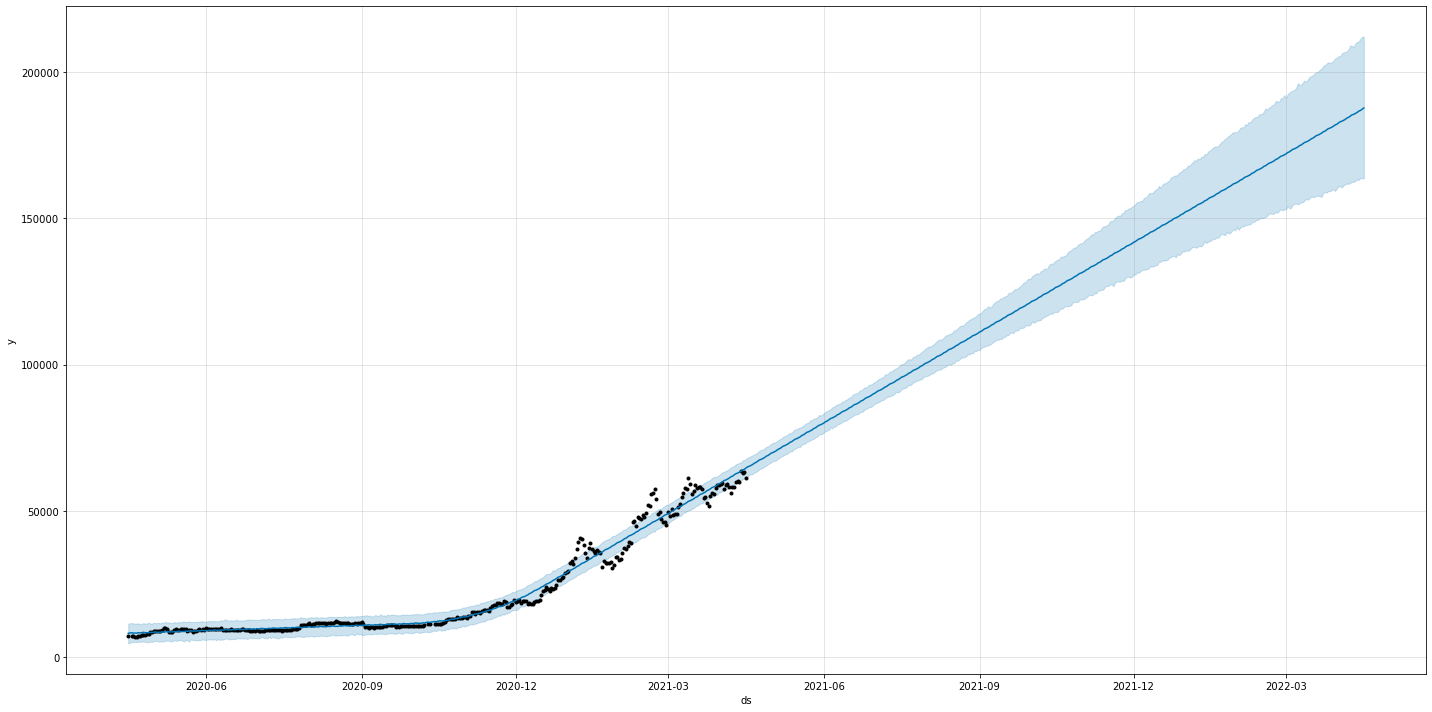

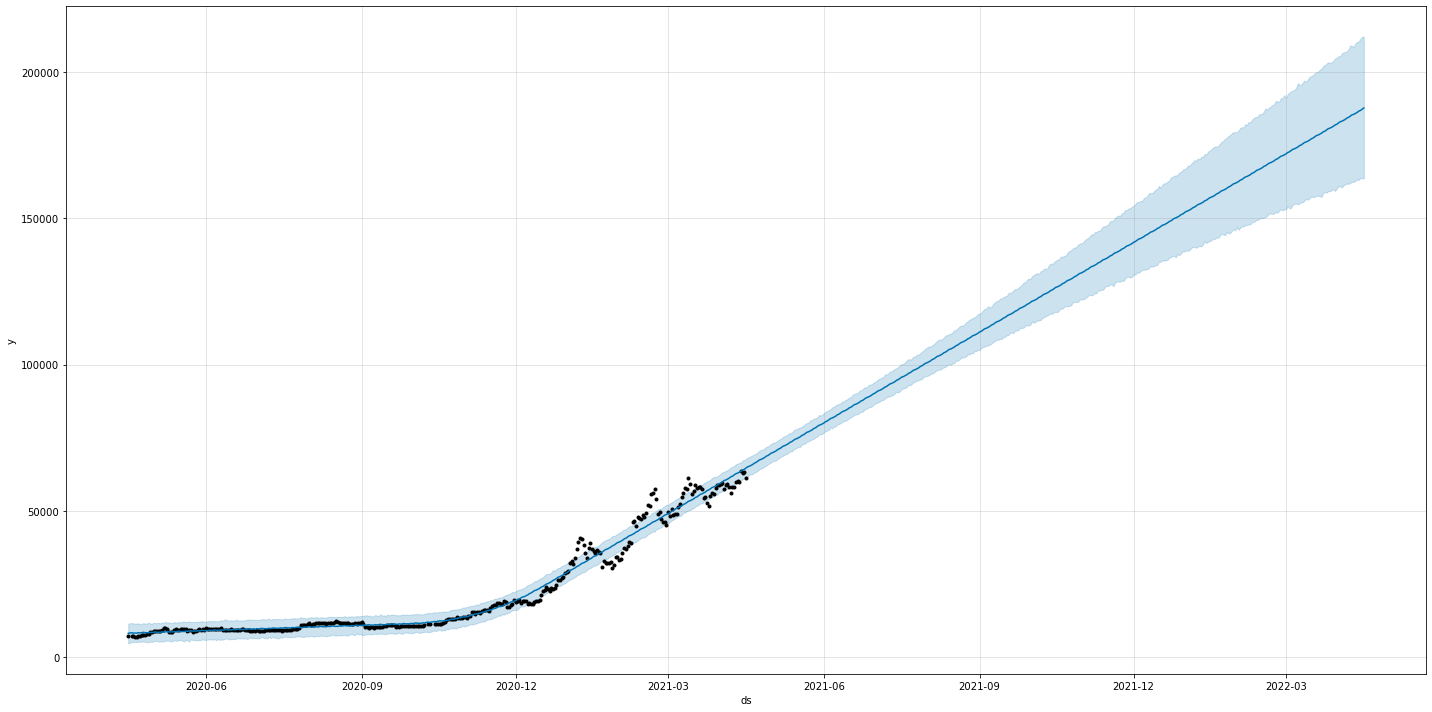

In [25]:
prophet.plot(forecast, figsize = (20,10))